# Advanced figures

When you are printing out 

In [1]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/wisconsin.zip'

In [3]:
def load_wisconsin(path):
    '''
    Load and clean the wisconsin breast cancer 
    dataset.
    '''
    recoded_label = {'diagnosis': {'M':'1',
                                   'B':'0'}}
    
    to_drop = ['Unnamed: 0', 'id']
    df = (pd.read_csv(path)
            .drop(to_drop, axis=1) 
            .replace(recoded_label)
            .astype({'diagnosis': np.byte})
         )
    return df[df.columns[1:]], df['diagnosis']

In [4]:
X, y = load_wisconsin(DATA_URL)
X.head().head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Visualising Correlations with a heatmap

In [6]:
feature_corr = X.corr()

In [17]:
feature_corr.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

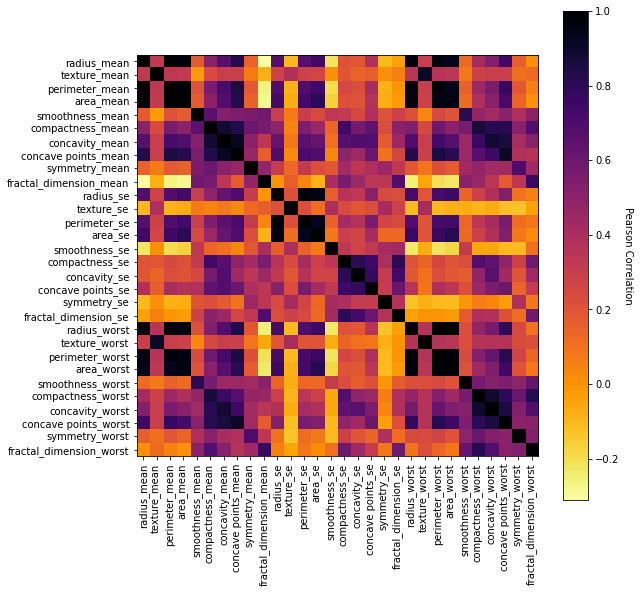

In [45]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
im = ax.imshow(feature_corr, cmap='inferno_r')

# Make sure there are enough visible tick marks
ax.set_xticks(ticks=np.arange(len(feature_corr.columns)))
ax.set_yticks(ticks=np.arange(len(feature_corr.columns)))

# add the feature names and rotate x axis 90 degrees.
ax.set_xticklabels(list(feature_corr.columns), rotation=90)
ax.set_yticklabels(list(feature_corr.index))

# add colour coding legend
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Pearson Correlation', rotation=-90, va="bottom");

In [ ]:
selected_features1 = ['radius_mean', 'texture_mean']
selected_features2 = ['radius_mean', 'texture_mean']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
bxplt1 = ax1.boxplot(X_train[selected_features])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    random_state=42)

print(f'{len(X_train)=}')
print(f'{len(X_test)=}')

In [ ]:
model = Lasso(alpha=0.1)
model.fit(X=X_train, y=y_train)

In [ ]:
preds = model.predict(X_test)